<a href="https://colab.research.google.com/github/YusufAbdurrahmann/student-mark-clustering/blob/main/student_mark_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# **Data Import**

In [2]:
df = pd.read_csv("sample_data/nilaimahasiswa.csv", sep=";", engine = "python")
df.head()

,Mahasiswa,uts,uas
0,AHMAD,15,46
1,ARFENDO,66,77
2,LATIFUDIN,25,33
3,HENDI,53,81
4,M. FERYAN,20,75


# **Data Understanding**

In [3]:
df.shape

(50, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Mahasiswa  50 non-null     object
 1   uts        50 non-null     int64 
 2   uas        50 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


In [5]:
df.describe()

,uts,uas
count,50.000000,50.000000
mean,56.220000,60.960000
std,27.316953,25.235996
min,12.000000,0.000000
25%,30.250000,45.000000
50%,55.000000,56.000000
75%,71.500000,81.000000
max,100.000000,100.000000


# **Data Cleaning**

In [6]:
df.isnull().sum()

,0
Mahasiswa,0
uts,0
uas,0


In [7]:
df.duplicated().sum()

np.int64(0)

# **Explanatory Data Analysis (EDA)**

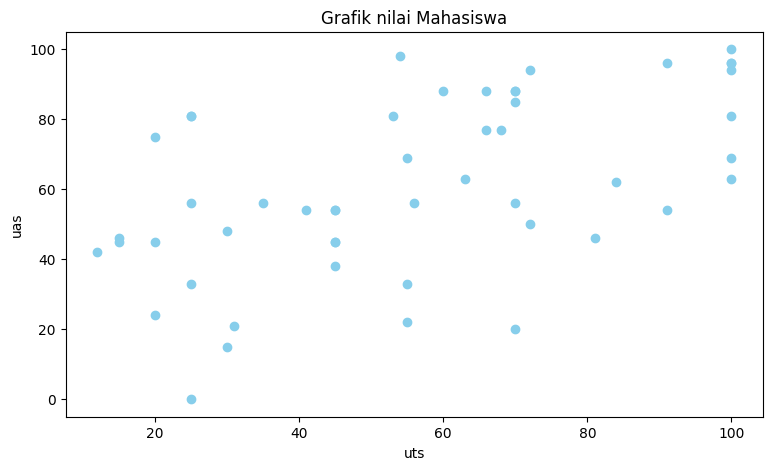

In [8]:
plt.figure(figsize = (9,5))
plt.scatter(df["uts"],df["uas"], color = "skyblue")
plt.title("Grafik nilai Mahasiswa")
plt.xlabel("uts")
plt.ylabel("uas")
plt.show()

# **Data Preperation**

In [9]:
x_train = df[["uts","uas"]].values

In [10]:
x_train

array([[ 15,  46],
       [ 66,  77],
       [ 25,  33],
       [ 53,  81],
       [ 20,  75],
       [100,  94],
       [ 55,  69],
       [ 25,  56],
       [ 25,  81],
       [ 30,  48],
       [ 15,  45],
       [ 81,  46],
       [ 68,  77],
       [ 72,  50],
       [ 56,  56],
       [ 63,  63],
       [100,  69],
       [ 35,  56],
       [ 55,  33],
       [ 31,  21],
       [ 55,  22],
       [ 70,  85],
       [ 30,  15],
       [ 25,  81],
       [ 12,  42],
       [ 20,  24],
       [ 72,  94],
       [ 25,   0],
       [ 91,  54],
       [ 60,  88],
       [ 45,  54],
       [ 70,  56],
       [100,  63],
       [ 45,  45],
       [ 45,  54],
       [ 70,  88],
       [ 45,  45],
       [ 70,  20],
       [100,  81],
       [100,  96],
       [100, 100],
       [ 45,  38],
       [ 66,  88],
       [100,  96],
       [ 54,  98],
       [ 20,  45],
       [ 91,  96],
       [ 41,  54],
       [ 70,  88],
       [ 84,  62]])

# **Feature Scaling**

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

# **Modelling (Clustering)**

In [58]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters = 2)
y_cluster = kmean.fit_predict(x_train)

In [59]:
y_cluster

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1], dtype=int32)

In [60]:
df["Cluster"] = y_cluster

In [61]:
kmean.cluster_centers_

array([[0.25227273, 0.4356    ],
       [0.75272727, 0.7836    ]])

In [62]:
df

,Mahasiswa,uts,uas,Cluster
0,AHMAD,15,46,0
1,ARFENDO,66,77,1
2,LATIFUDIN,25,33,0
3,HENDI,53,81,1
4,M. FERYAN,20,75,0
5,RENDI,100,94,1
6,NUREKA,55,69,1
7,INDRA,25,56,0
8,MOCH IDWAL,25,81,0
9,REYNO YUSUF,30,48,0


<ipython-input-63-852c59e884e4>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmean.cluster_centers_[0,0],kmean.cluster_centers_[0,1],cmap="rainbow",marker="*", s = 150, label="Centroid = 0")
<ipython-input-63-852c59e884e4>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmean.cluster_centers_[1,0],kmean.cluster_centers_[1,1],cmap="rainbow",marker="*", s = 150, label="Centroid = 1")


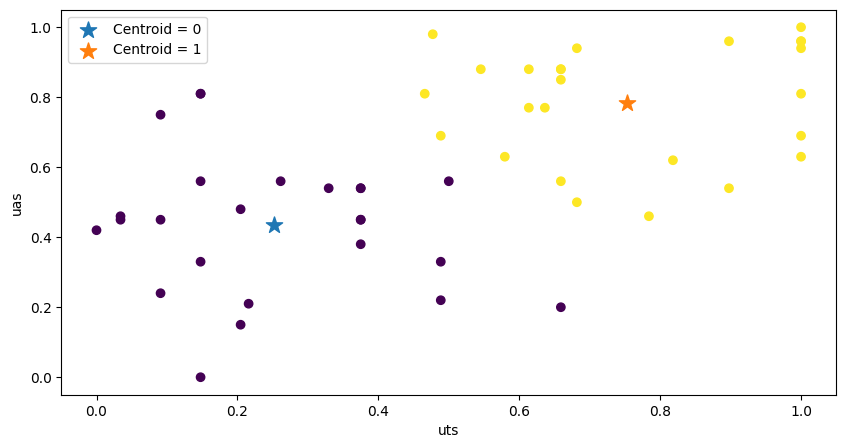

In [63]:
plt.figure(figsize = (10,5))
plt.scatter(x_train[:,0], x_train[:,1], c=kmean.labels_)
plt.scatter(kmean.cluster_centers_[0,0],kmean.cluster_centers_[0,1],cmap="rainbow",marker="*", s = 150, label="Centroid = 0")
plt.scatter(kmean.cluster_centers_[1,0],kmean.cluster_centers_[1,1],cmap="rainbow",marker="*", s = 150, label="Centroid = 1")
# plt.scatter(kmean.cluster_centers_[2,0],kmean.cluster_centers_[2,1],cmap="rainbow",marker="*", s = 150, label="Centroid = 2")
plt.xlabel("uts")
plt.ylabel("uas")
plt.legend()
plt.show()

In [64]:
inertias = []
k_range = range(1,10)
for k in k_range:
  km = KMeans(n_clusters = k).fit(x_train)
  inertias.append(km.inertia_)

In [65]:
inertias

[7.842257805785125,
 3.197773404958677,
 2.4470434818745304,
 1.9704946489690285,
 1.5823149338351046,
 1.0203787685890784,
 0.7820673989079109,
 0.5840897479666799,
 0.5837318058835104]

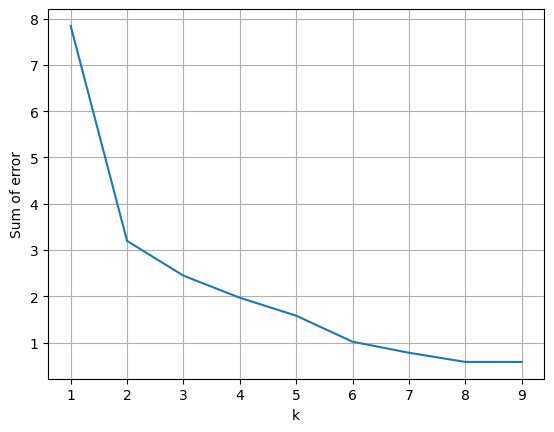

In [66]:
plt.xlabel("k")
plt.ylabel("Sum of error")
plt.plot(k_range,inertias)
plt.grid()

In [67]:
df["Cluster"] = df["Cluster"].replace([0,1],["Kurang","baik"])

In [68]:
df

,Mahasiswa,uts,uas,Cluster
0,AHMAD,15,46,Kurang
1,ARFENDO,66,77,baik
2,LATIFUDIN,25,33,Kurang
3,HENDI,53,81,baik
4,M. FERYAN,20,75,Kurang
5,RENDI,100,94,baik
6,NUREKA,55,69,baik
7,INDRA,25,56,Kurang
8,MOCH IDWAL,25,81,Kurang
9,REYNO YUSUF,30,48,Kurang
